# 4. 로지스틱 회귀(Logistic Regression)

일상 속 풀고자하는 많은 문제 중에서는 두 개의 선택지 중에서 정답을 고르는 문제가 많습니다. 예를 들어 시험을 봤는데 이 시험 점수가 합격인지 불합격인지가 궁금할 수도 있고, 어떤 메일을 받았을 때 이게 정상 메일인지 스팸 메일인지를 분류하는 문제도 그렇습니다. 이렇게 둘 중 하나를 결정하는 문제를 **이진 분류(Binary Classification)** 라고 합니다. 그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다.

**로지스틱 회귀는 알고리즘의 이름은 회귀이지만 실제로는 분류(Classification) 작업에 사용할 수 있습니다.**

<br>

# 1. 로지스틱 회귀(Logistic Regression)

## 1.1 이진 분류(Binary Classification)

학생들이 시험 성적에 따라서 합격, 불합격이 기재된 데이터가 있다고 가정해봅시다. 시험 성적이 $x$라면, 합불 결과는 $y$입니다. 이 시험의 커트라인은 공개되지 않았는데 이 데이터로부터 특정 점수를 얻었을 때의 합격, 불합격 여부를 판정하는 모델을 만들고자 합시다.

|score($x$)|result($y$)|
|:----|:----|
|45|불합격|
|50|불합격|
|55|불합격|
|60|합격|
|65|합격|
|70|합격|

위의 데이터에서 합격을 1, 불합격을 0이라고 하였을 때 그래프를 그려보면 아래와 같습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG">
</p>

이러한 점들을 표현하는 그래프는 알파벳의 S자 형태로 표현됩니다. 이러한 $x$와 $y$의 관계를 표현하기 위해서는 $Wx+b$와 같은 직선 함수가 아니라 S자 형태로 표현할 수 있는 함수가 필요합니다. 이런 문제에 직선을 사용할 경우 분류 작업이 잘 동작하지 않습니다.

그래서 이번 로지스틱 회귀의 가설은 선형 회귀 때의 $H(x)=Wx+b$가 아니라, 위와 같이 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 $f$를 추가적으로 사용하여 $H(x)=f(Wx+b)$의 가설을 사용할 겁니다. 그리고 위와 같이 S자 모양의 그래프를 그릴 수 있는 어떤 함수 $f$가 이미 널리 알려져있습니다. 바로 시그모이드 함수입니다.

<br>

## 1.2 시그모이드 함수(Sigmoid function)

위와 같이 S자 형태로 그래프를 그려주는 시그모이드 함수의 방정식은 아래와 같습니다.

$$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = \sigma(Wx + b)$$

선형 회귀에서는 최적의 $W$와 $b$를 찾는 것이 목표였습니다. 여기서도 마찬가지입니다. 선형 회귀에서는 $W$가 직선의 기울기, $b$가 y절편을 의미했습니다. 그렇다면 여기에서는 $W$와 $b$가 함수의 그래프에 어떤 영향을 주는지 직접 그래프를 그려서 알아보겠습니다.

우선 Matplotlib과 Numpy를 임포트합니다.

In [1]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

Numpy를 사용하여 시그모이드 함수를 정의합니다.

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1 / (1 + np.exp(-x))

### 1. W가 1이고 b가 0인 그래프

가장 먼저 $W$가 1이고, $b$가 0인 그래프를 그려봅시다.

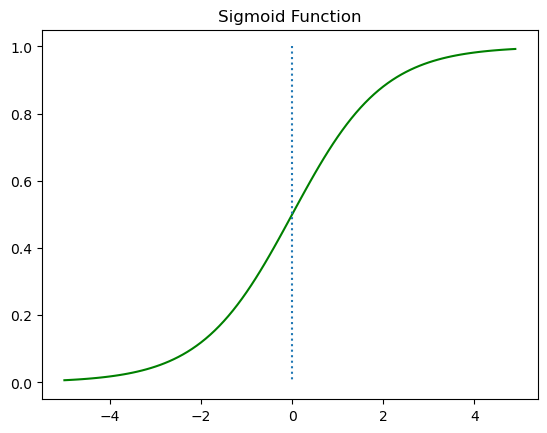

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프를 통해시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환함을 알 수 있습니다. $x$가 0일 때 0.5의 값을 가집니다. $x$가 매우 커지면 1에 수렴합니다. 반면, $x$가 매우 작아지면 0에 수렴합니다.

<br>

### 2. W값의 변화에 따른 경사도의 변화

이제 $W$의 값을 변화시키고 이에 따른 그래프를 확인해보겠습니다.

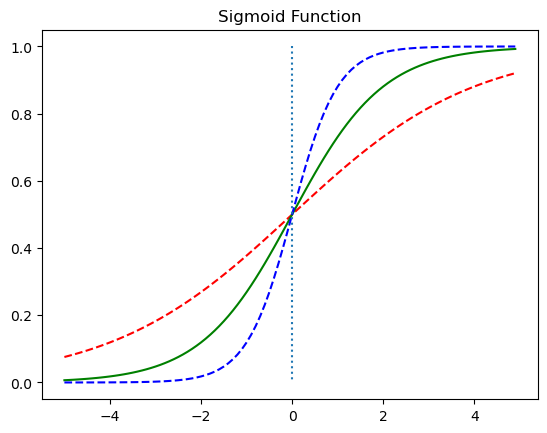

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 $W$의 값이 0.5일때 빨간색선, $W$의 값이 1일때는 초록색선, $W$의 값이 2일때 파란색선이 나오도록 하였습니다. 자세히 보면 $W$의 값에 따라 그래프의 경사도가 변하는 것을 볼 수 있습니다. 앞서 선형 회귀에서 가중치 $W$는 직선의 기울기를 의미했지만, 여기서는 그래프의 경사도를 결정합니다. $W$의 값이 커지면 경사가 커지고 $W$의 값이 작아지면 경사가 작아집니다.

<br>

### 3. b값의 변화에 따른 좌, 우 이동

이제 $b$의 값에 따라서 그래프가 어떻게 변하는지 확인해보겠습니다.

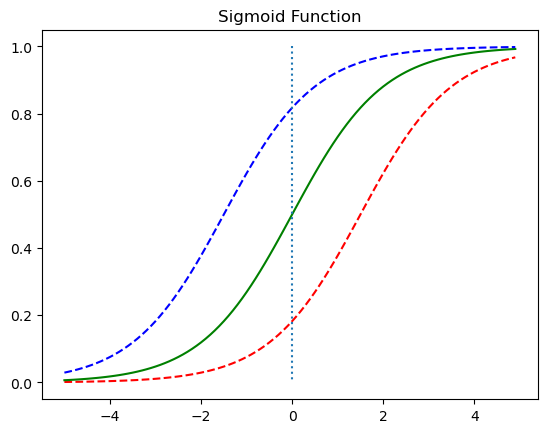

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x-1.5)
y2 = sigmoid(x)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위의 그래프는 $b$의 값에 따라서 그래프가 좌, 우로 이동하는 것을 보여줍니다.

<br>

### 4. 시그모이드 함수를 이용한 분류

시그모이드 함수는 입력값이 한없이 커지면 1에 수렴하고, 입력값이 한없이 작아지면 0에 수렴합니다. **시그모이드 함수의 출력값은 0과 1 사이의 값을 가지는데** 이 특성을 이용하여 분류 작업에 사용할 수 있습니다. 예를 들어 임계값을 0.5라고 정해보겠습니다. 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)으로 판단하도록 할 수 있습니다. 이를 확률이라고 생각하면 해당 레이블에 속할 확률이 50%가 넘으면 해당 레이블로 판단하고, 해당 레이블에 속할 확률이 50%보다 낮으면 아니라고 판단하는 것으로 볼 수 있습니다.

<br>

## 1.3 비용 함수(Cost function)

이제 로지스틱 회귀의 가설이 $H(x)=sigmoid(Wx+b)$인 것은 알았습니다. 이제 최적의 $W$와 $b$를 찾을 수 있는 비용 함수(cost function)를 정의해야 합니다. 그런데 혹시 앞서 선형 회귀에서 배운 비용 함수인 평균 제곱 오차(Mean Square Error, MSE)를 로지스틱 회귀의 비용 함수로 그냥 사용하면 안 될까요?

다음은 선형 회귀에서 사용했던 평균 제곱 오차의 수식입니다.

$$cost(W, b) = \frac{1}{n} \sum_{i=1}^{n} \left[y^{(i)} - H(x^{(i)})\right]^2$$

위의 비용 함수 수식에서 가설은 이제 $H(x)=Wx+b$가 아니라 $H(x)=sigmoid(Wx+b)$입니다. 그리고 이 비용 함수를 미분하면 선형 회귀때와 달리 다음과 같이 비볼록(non-convex) 형태의 그래프가 나옵니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%BB%AC%EB%AF%B8%EB%8B%88%EB%A9%88.PNG">
</p>

위와 같은 그래프에 경사 하강법을 사용할 경우의 문제점은 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 점입니다. 사람이 등산 후에 산을 내려올 때도, 가파른 경사를 내려오다가 넓은 평지가 나오면 순간적으로 다 내려왔다고 착각할 수 있습니다. 하지만 실제로는 그곳이 다 내려온 것이 아니라 잠깐 평지가 나왔을 뿐이라면 길을 더 찾아서 더 내려가야 할 겁니다. 모델도 마찬가지로 실제 오차가 최소가 되는 구간을 찾을 수 있도록 도와주어야 합니다. 만약, 실제 최소가 되는 구간을 잘못 판단하면 최적의 가중치 $W$가 아닌 다른 값을 택해 모델의 성능이 더 오르지 않습니다.

이를 전체 함수에 걸쳐 최소값인 글로벌 미니멈(Global Minimum)이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum)에 도달했다고 합니다. 이는 cost가 최소가 되는 가중치 $W$를 찾는다는 비용 함수의 목적에 맞지 않습니다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이의 값이라는 점입니다. 즉, 실제값이 1일 때 예측값이 0에 가까워지면 오차가 커져야 하며, 실제값이 0일 때, 예측값이 1에 가까워지면 오차가 커져야 합니다. 그리고 이를 충족하는 함수가 바로 로그 함수입니다. 다음은 $x=0.5$ 에 대칭하는 두 개의 로그 함수 그래프입니다.

<p align="center">
<img alt="image" src="https://thebook.io/img/080324/060.jpg">
</p>

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/57805/%EA%B7%B8%EB%9E%98%ED%94%84.PNG">
</p>

실제값이 1일 때의 그래프를 주황색 선으로 표현하였으며, 실제값이 0일 때의 그래프를 초록색 선으로 표현하였습니다. 실제값이 1이라고 해봅시다. 이 경우, 예측값인 $H(x)$의 값이 1이면 오차가 0이므로 당연히 cost는 0이 됩니다. 반면, $H(x)$가 0으로 수렴하면 cost는 무한대로 발산합니다. 실제값이 0인 경우는 그 반대로 이해하면 됩니다. 이 두 개의 로그 함수를 식으로 표현하면 다음과 같습니다.

$$\text{if } y=1 ,  \text{cost}\left( H(x), y \right) = -\log(H(x))$$

$$\text{if } y=0 , \text{cost}\left( H(x), y \right) = -\log(1-H(x))$$

$y$의 실제값이 1일 때 $−logH(x)$ 그래프를 사용하고 $y$의 실제값이 0일 때 $−log(1−H(X))$ 그래프를 사용해야 합니다.

이는 다음과 같이 하나의 식으로 통합할 수 있습니다.

$$\text{cost}\left( H(x), y \right) = -[ylogH(x) + (1-y)log(1-H(x))]$$

왜 위 식이 두 개의 식을 통합한 식이라고 볼 수 있을까요? 실제값 $y$가 1이라고하면 덧셈 기호를 기준으로 우측의 항이 없어집니다. 반대로 실제값 $y$가 0이라고 하면 덧셈 기호를 기준으로 좌측의 항이 없어집니다. 선형 회귀에서는 모든 오차의 평균을 구해 평균 제곱 오차를 사용했었습니다. 마찬가지로 여기에서도 모든 오차의 평균을 구합니다.

$$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$$

정리하면, 위 비용 함수는 실제값 $y$와 예측값 $H(x)$의 차이가 커지면 cost가 커지고, 실제값 $y$와 예측값 $H(x)$의 차이가 작아지면 cost는 작아집니다. 이제 위 비용 함수에 대해서 경사 하강법을 수행하면서 최적의 가중치 $W$를 찾아갑니다.

$$W := W - \alpha\frac{\partial}{\partial W}cost(W)$$

<br>

## 1.4 파이토치로 로지스틱 회귀 구현하기

이제 파이토치로 로지스틱 회귀 중에서도 다수의 $x$로 부터 $y$를 예측하는 다중 로지스틱 회귀를 구현해봅시다.

우선 필요한 도구들을 임포트합니다.

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

`x_train`과 `y_train`을 텐서로 선언합니다.

In [7]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

앞서 훈련 데이터를 행렬로 선언하고, 행렬 연산으로 가설을 세우는 방법을 배웠습니다. 여기서도 마찬가지로 행렬 연산을 사용하여 가설식을 세울겁니다. `x_train`과 `y_train`의 크기를 확인해봅시다.

In [8]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


현재 `x_train`은 6 × 2의 크기(shape)를 가지는 행렬이며, `y_train`은 6 × 1의 크기를 가지는 벡터입니다. `x_train`을 $X$라고 하고, 이와 곱해지는 가중치 벡터를 $W$라고 하였을 때, $XW$가 성립되기 위해서는 $W$ 벡터의 크기는 2 × 1이어야 합니다. 이제 $W$와 $b$를 선언합니다.

In [9]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

이제 가설식을 세워보겠습니다. 파이토치에서는 $e^{x}$를 구현하기 위해서 `torch.exp(x)`를 사용합니다. 이에 따라 행렬 연산을 사용한 가설식은 다음과 같습니다.

In [10]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

앞서 $W$와 $b$는 `torch.zeros`를 통해 전부 0으로 초기화 된 상태입니다. 이 상태에서 예측값을 출력해봅시다.

In [11]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


실제값 `y_train`과 크기가 동일한 6 × 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5입니다.

사실 가설식을 좀 더 간단하게도 구현할 수 있습니다. 이미 파이토치에서는 시그모이드 함수를 이미 구현하여 제공하고 있기 때문입니다. 다음은 `torch.sigmoid`를 사용하여 좀 더 간단히 구현한 가설식입니다.

In [12]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

앞서 구현한 식과 본질적으로 동일한 식입니다. 마찬가지로 $W$와 $b$가 0으로 초기화 된 상태에서 예측값을 출력해봅시다.

In [13]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


앞선 결과와 동일하게 `y_train`과 크기가 동일한 6 × 1의 크기를 가지는 예측값 벡터가 나오는데 모든 값이 0.5입니다.

이제 아래의 비용 함수값. 즉, 현재 예측값과 실제값 사이의 cost를 구해보겠습니다.

$$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}logH(x^{(i)}) + (1-y^{(i)})log(1-H(x^{(i)}))]$$

우선, 현재 예측값과 실제값을 출력해보겠습니다.

In [14]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


현재 총 6개의 원소가 존재하지만 하나의 샘플. 즉, 하나의 원소에 대해서만 오차를 구하는 식을 작성해보겠습니다.

In [15]:
-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward0>)

이제 모든 원소에 대해서 오차를 구해보겠습니다.

In [16]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))

print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


그리고 이 전체 오차에 대한 평균을 구합니다.

In [17]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


결과적으로 얻은 cost는 0.6931입니다.

지금까지 비용 함수의 값을 직접 구현하였는데, 사실 파이토치에서는 로지스틱 회귀의 비용 함수를 이미 구현해서 제공하고 있습니다.

사용 방법은 `torch.nn.functional as F`와 같이 임포트 한 후에 `F.binary_cross_entropy(예측값, 실제값)`과 같이 사용하면 됩니다.

In [18]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

동일하게 cost가 0.6931이 출력되는 것을 볼 수 있습니다. 모델의 훈련 과정까지 추가한 전체 코드는 아래와 같습니다.

In [19]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [20]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


학습이 끝났습니다. 이제 훈련했던 훈련 데이터를 그대로 입력으로 사용했을 때, 제대로 예측하는지 확인해보겠습니다. 현재 $W$와 $b$는 훈련 후의 값을 가지고 있습니다. 현재 $W$와 $b$를 가지고 예측값을 출력해보겠습니다.

In [21]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


현재 위 값들은 0과 1 사이의 값을 가지고 있습니다. 이제 0.5를 넘으면 True, 넘지 않으면 False로 값을 정하여 출력해보겠습니다.

In [22]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


실제값은 [[0], [0], [0], [1], [1], [1]]이므로, 이는 결과적으로 False, False, False, True, True, True와 동일합니다. 즉, 기존의 실제값과 동일하게 예측한 것을 볼 수 있습니다. 훈련이 된 후의 $W$와 $b$의 값을 출력해보겠습니다.

In [23]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


<br>

# 2. nn.Module로 구현하는 로지스틱 회귀

잠깐만 복습을 해보면 선형 회귀 모델의 가설식은 $H(x)=Wx+b$이었습니다. 그리고 이 가설식을 구현하기 위해서 파이토치의 `nn.Linear()`를 사용했습니다. 그리고 로지스틱 회귀의 가설식은 $H(x)=sigmoid(Wx+b)$입니다. 파이토치에서는 `nn.Sigmoid()`를 통해서 시그모이드 함수를 구현하므로 결과적으로 `nn.Linear()`의 결과를 `nn.Sigmoid()`를 거치게 하면 로지스틱 회귀의 가설식이 됩니다.

파이토치를 통해 이를 구현해봅시다.

## 2.1 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

우선 구현을 위해 필요한 파이토치의 도구들을 임포트합니다.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

훈련 데이터를 텐서로 선언합니다.

In [25]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

`nn.Sequential()`은 `nn.Module` 층을 차례로 쌓을 수 있도록 합니다. 뒤에서 이를 이용해서 인공 신경망을 구현하게 되므로 기억하고 있으면 좋습니다. 조금 쉽게 말해서 `nn.Sequential()`은 $Wx+b$와 같은 수식과 시그모이드 함수 등과 같은 여러 함수들을 연결해주는 역할을 합니다. 이를 이용해서 로지스틱 회귀를 구현해봅시다.

In [26]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

현재 $W$와 $b$는 랜덤 초기화가 된 상태입니다. 훈련 데이터를 넣어 예측값을 확인해봅시다.

In [27]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

6 × 1 크기의 예측값 텐서가 출력됩니다. 그러나 현재 $W$와 $b$는 임의의 값을 가지므로 현재의 예측은 의미가 없습니다. 이제 경사 하강법을 사용하여 훈련해보겠습니다. 총 100번의 에포크를 수행합니다.

In [28]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 50번마다 로그 출력
    if epoch % 50 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00%
Epoch  250/1000 Cost: 0.067248 Accuracy 100.00%
Epoch  300/1000 Cost: 0.057820 Accuracy 100.00%
Epoch  350/1000 Cost: 0.050753 Accuracy 100.00%
Epoch  400/1000 Cost: 0.045251 Accuracy 100.00%
Epoch  450/1000 Cost: 0.040843 Accuracy 100.00%
Epoch  500/1000 Cost: 0.037228 Accuracy 100.00%
Epoch  550/1000 Cost: 0.034210 Accuracy 100.00%
Epoch  600/1000 Cost: 0.031649 Accuracy 100.00%
Epoch  650/1000 Cost: 0.029449 Accuracy 100.00%
Epoch  700/1000 Cost: 0.027538 Accuracy 100.00%
Epoch  750/1000 Cost: 0.025862 Accuracy 100.00%
Epoch  800/1000 Cost: 0.024381 Accuracy 100.00%
Epoch  850/1000 Cost: 0.023061 Accuracy 100.00%
Epoch  900/1000 Cost: 0.021877 Accuracy 100.00%
Epoch  950/1000 Cost: 0.020810 Accuracy 100.00%
Epoch 1000/1000 Cost: 0.019843 Accuracy 10

중간부터 정확도는 100%가 나오기 시작합니다. 기존의 훈련 데이터를 입력하여 예측값을 확인해보겠습니다.

In [29]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

0.5를 넘으면 True, 그보다 낮으면 False로 간주합니다. 실제값은 [[0], [0], [0], [1], [1], [1]]입니다. 이는 False, False, False, True, True, True에 해당되므로 전부 실제값과 일치하도록 예측한 것을 확인할 수 있습니다.

훈련 후의 $W$와 $b$의 값을 출력해보겠습니다.

In [30]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]


출력값이 앞 챕터에서 `nn.Module`을 사용하지 않고 로지스틱 회귀를 구현한 실습에서 얻었던 $W$와 $b$와 거의 일치합니다.

<br>

## 2.2 인공 신경망으로 표현되는 로지스틱 회귀

사실 로지스틱 회귀는 인공 신경망으로 간주할 수 있습니다.

<p align="center">
<img alt="image" src="https://wikidocs.net/images/page/58686/logistic_regression.PNG">
</p>

위의 인공 신경망 그림에서 각 화살표는 입력과 곱해지는 가중치 또는 편향입니다. 각 입력에 대해서 검은색 화살표는 가중치, 회색 화살표는 편향이 곱해집니다. 각 입력 $x$는 각 입력의 가중치 $w$와 곱해지고, 편향 $b$는 상수 1과 곱해지는 것으로 표현되었습니다. 그리고 출력하기 전에 시그모이드 함수를 지나게 됩니다.

결과적으로 위의 인공 신경망은 다음과 같은 다중 로지스틱 회귀를 표현하고 있습니다.

$$H(x)=sigmoid(x_{1}w_{1} + x_{2}w_{2} + b)$$

**뒤에서 인공 신경망을 배우면서 언급하겠지만, 시그모이드 함수는 인공 신경망의 은닉층에서는 거의 사용되지 않습니다.**

<br>

# 3. 클래스로 파이토치 모델 구현하기

파이토치의 대부분의 구현체들은 대부분 모델을 생성할 때 클래스(Class)를 사용하고 있습니다. 앞서 배운 선형 회귀를 클래스로 구현해보겠습니다. 앞서 구현한 코드와 다른 점은 오직 클래스로 모델을 구현했다는 점입니다.

## 3.1 모델을 클래스로 구현하기

앞서 로지스틱 회귀 모델은 다음과 같이 구현했었습니다.

In [31]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

이를 클래스로 구현하면 다음과 같습니다.

In [32]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

위와 같은 클래스를 사용한 모델 구현 형식은 대부분의 파이토치 구현체에서 사용하고 있는 방식으로 반드시 숙지할 필요가 있습니다.

클래스(class) 형태의 모델은 `nn.Module` 을 상속받습니다. 그리고 `__init__()`에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다. 이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다. `super()` 함수를 부르면 여기서 만든 클래스는 `nn.Module` 클래스의 속성들을 가지고 초기화 됩니다.

`foward()` 함수는 모델이 학습데이터를 입력받아서 forward 연산을 진행시키는 함수입니다. 이 `forward()` 함수는 model 객체를 데이터와 함께 호출하면 자동으로 실행이됩니다. 예를 들어 model이란 이름의 객체를 생성 후, model(입력 데이터)와 같은 형식으로 객체를 호출하면 자동으로 forward 연산이 수행됩니다.

* $H(x)$ 식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.

<br>

## 3.2 로지스틱 회귀 클래스로 구현하기

이제 모델을 클래스로 구현한 코드를 보겠습니다. 달라진 점은 모델을 클래스로 구현했다는 점 뿐입니다. 다른 코드는 전부 동일합니다.

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [34]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [35]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [36]:
model = BinaryClassifier()

In [37]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00